# Análise Exploratória dos Dados (EDA)
Primeiro, vamos importar as bibliotecas necessárias e carregar os dados.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Carregar o dataset
df = pd.read_csv('desafio_indicium_imdb.csv', index_col=0)

# Mostrar as primeiras linhas do dataset
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### Análise de Valores Faltantes
Verificar se há valores faltantes no dataset.

In [165]:
# Mostrar informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


### Conversão de Variáveis e Tratamento de Valores Nulos

In [166]:
# Converter colunas para o tipo numérico quando apropriado
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

# Função para converter Runtime apenas em minutos
def convert_runtime(runtime_str):
    # Remove ' min' e converte para int
    minutes = int(runtime_str.replace(' min', ''))
    return minutes  # Retorna apenas o número de minutos como inteiro

# Aplica a função de conversão à coluna Runtime
df['Runtime'] = df['Runtime'].apply(convert_runtime)

# Remover caracteres não numéricos da coluna 'Gross' e converter para float essa coluna de faturamento
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)


In [167]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961.0,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956.0,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953.0,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944.0,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


A decisão sobre excluir valores nulos de um DataFrame depende de vários fatores, incluindo a proporção de valores ausentes, o impacto potencial dessa exclusão na análise e a natureza dos dados.

Mas tem umas orientações mais gerais que a comunidade no geral segue, sendo elas:

Baixa Proporção de Valores Nulos: Se menos de 5% dos dados estão ausentes, geralmente é seguro excluir esses valores sem afetar significativamente a análise.

Proporção Moderada de Valores Nulos (5-20%): Nessa faixa, a decisão depende do contexto e da importância das variáveis com valores ausentes. Substituir valores nulos por uma estatística (média, mediana, moda) ou usando técnicas de imputação pode ser mais adequado.

Alta Proporção de Valores Nulos (>20%): Se mais de 20% dos dados estão ausentes, excluir esses valores pode resultar na perda de informações importantes. Nesse caso, técnicas de imputação ou modelagem para lidar com valores ausentes são recomendadas.

In [168]:
# Calcular a proporção de valores nulos em cada coluna
null_proportion = df.isnull().mean() * 100

# Exibir a proporção de valores nulos
print(null_proportion)

Series_Title      0.000000
Released_Year     0.100100
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64


Como pode-se ver, a coluna **Gross** por exemplo, possui uma proporção de mais de 16% de valores nulos, excluir todas as linhas nulas, pode causar uma grande perca de informação dos dados. 

Sendo assim, para dá continuidade à análise exploratória, os valores nulos da coluna **Gross** que representa valores financeiros e pode ter uma distribuição assimétrica com muitos outliers (alguns filmes têm faturamentos extremamente altos em comparação com a maioria), serão substituídos pela mediana, que é geralmente a melhor escolha para esses valores financeiros.

In [169]:
# Calcular a mediana da coluna 'Gross'
median_gross = df['Gross'].median()

# Imputar valores nulos com a mediana
df['Gross'].fillna(median_gross, inplace=True)

# Verificar se os valores nulos foram preenchidos
print(df['Gross'].isnull().sum())

0


### Resumo Estatístico
Gerar um resumo estatístico das variáveis numéricas.

In [170]:
# Resumo estatístico
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,999.000000,999.000000,842.000000,9.990000e+02,9.990000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.053338e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.014694e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,5.011838e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,6.157656e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


### Visualizações e Observações
#### Distribuição das Avaliações IMDb

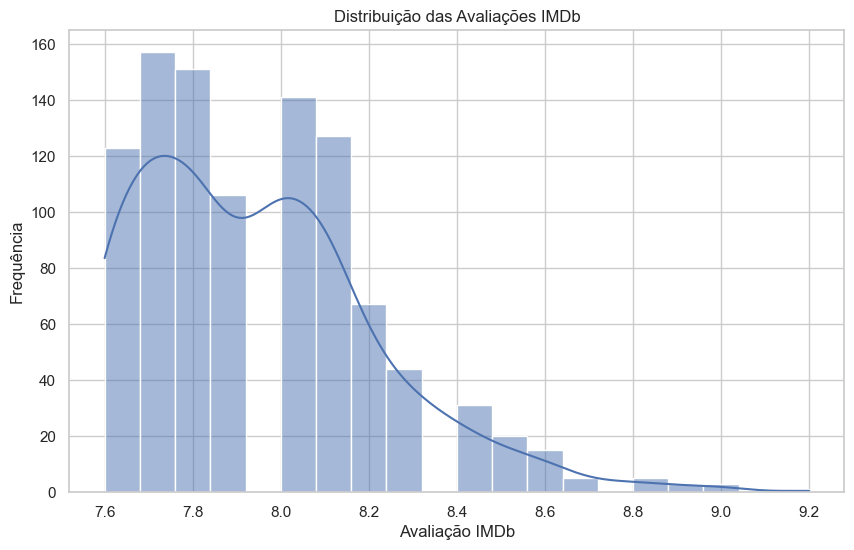

In [171]:
# Distribuição das avaliações IMDb
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribuição das Avaliações IMDb')
plt.xlabel('Avaliação IMDb')
plt.ylabel('Frequência')
plt.show()

#### Distribuição da Receita Bruta

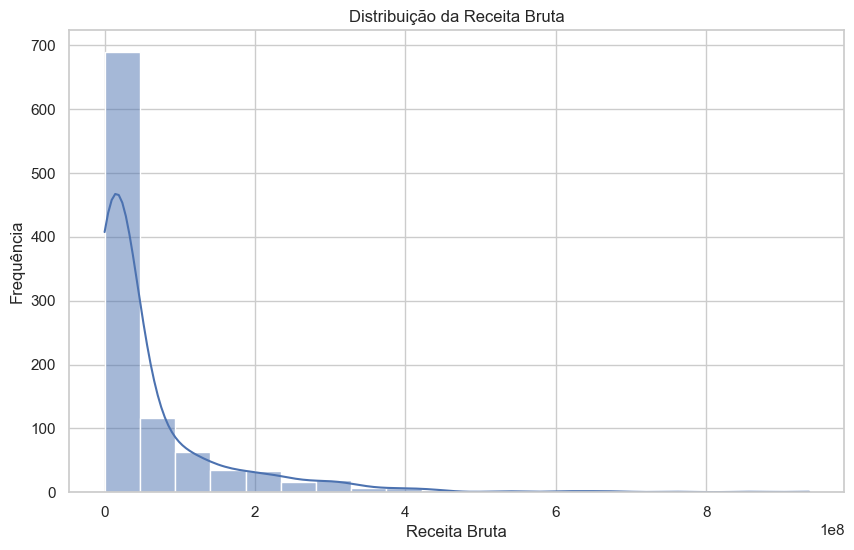

In [172]:

# Distribuição da receita bruta
plt.figure(figsize=(10, 6))
sns.histplot(df['Gross'], bins=20, kde=True)
plt.title('Distribuição da Receita Bruta')
plt.xlabel('Receita Bruta')
plt.ylabel('Frequência')
plt.show()

#### Correlação entre Variáveis

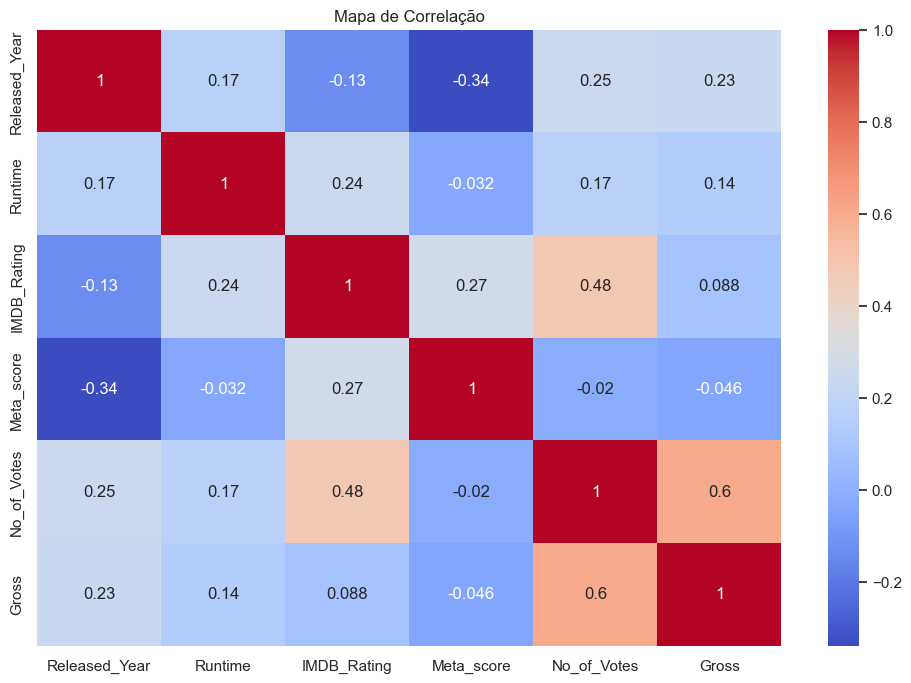

In [173]:
# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação
correlation_matrix = df[numeric_columns].corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

#### Avaliação IMDb vs Receita Bruta

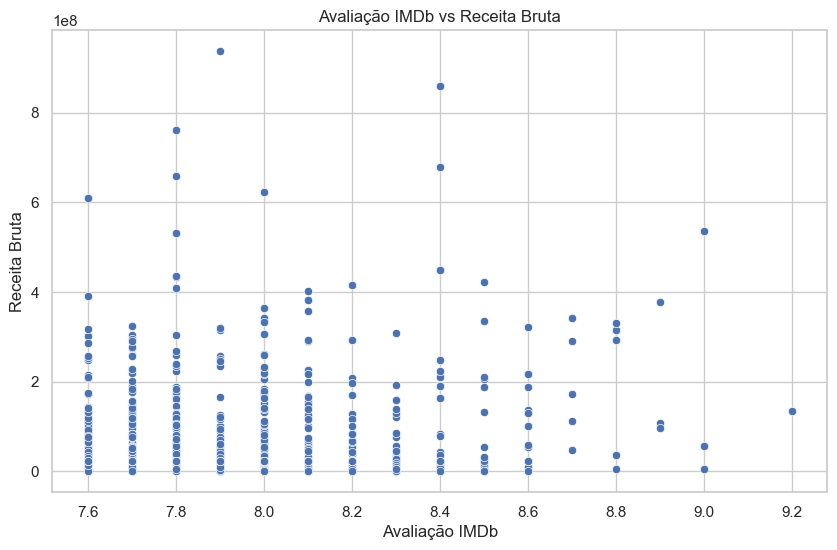

In [174]:
# Avaliação IMDb vs Receita Bruta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df)
plt.title('Avaliação IMDb vs Receita Bruta')
plt.xlabel('Avaliação IMDb')
plt.ylabel('Receita Bruta')
plt.show()

##### Análise
Podemos perceber que, filmes com as melhores avaliações, em sua maioria, não foram os que mais geraram receitas e grandes faturamentos.  

#### Análise de Texto da Coluna Overview

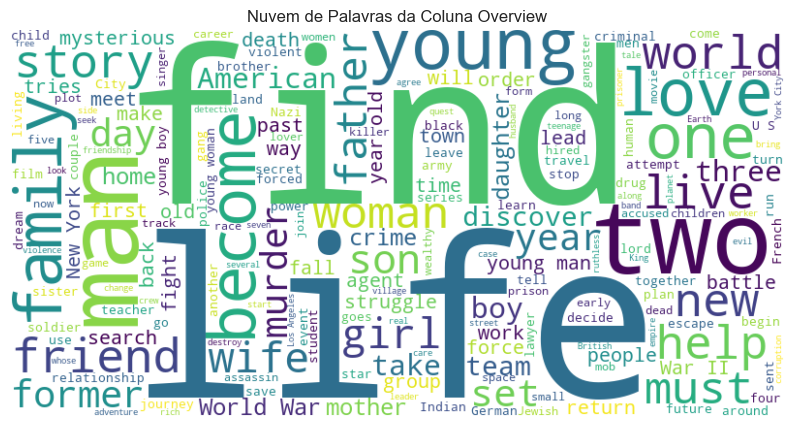

In [175]:
# Gerar uma nuvem de palavras para a coluna Overview
text = ' '.join(df['Overview'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras da Coluna Overview')
plt.show()

### Resolução de Questionamentos
#### A - Qual filme você recomendaria para uma pessoa que você não conhece?

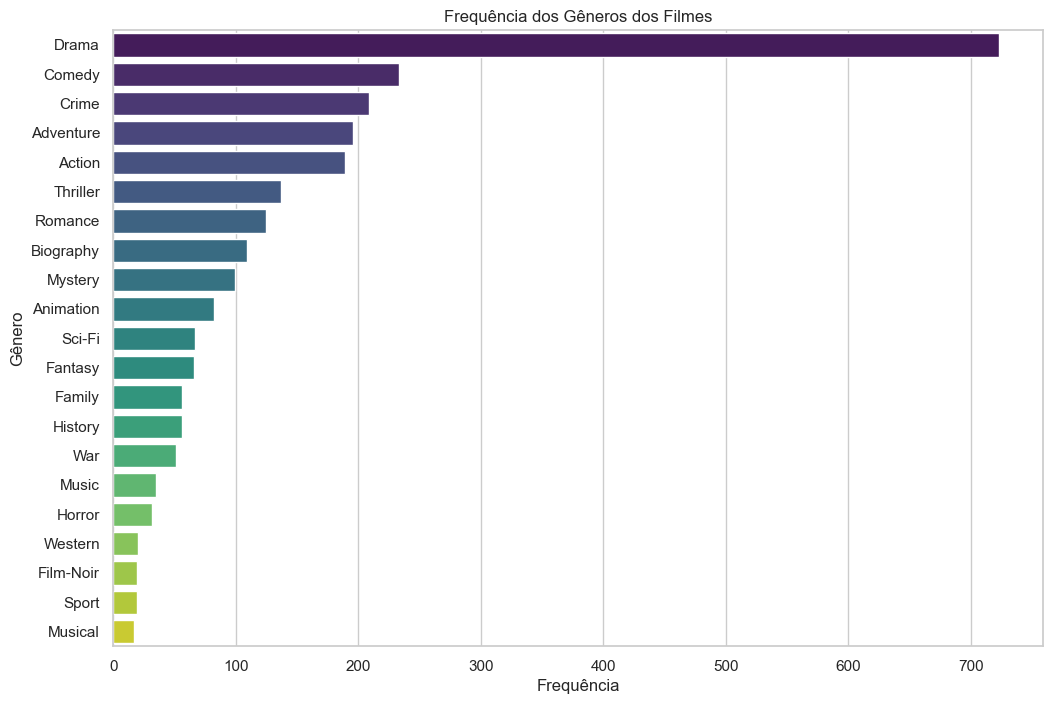

In [176]:
# Explodir os gêneros para contagem
genres = df['Genre'].str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Frequência dos Gêneros dos Filmes')
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.show()

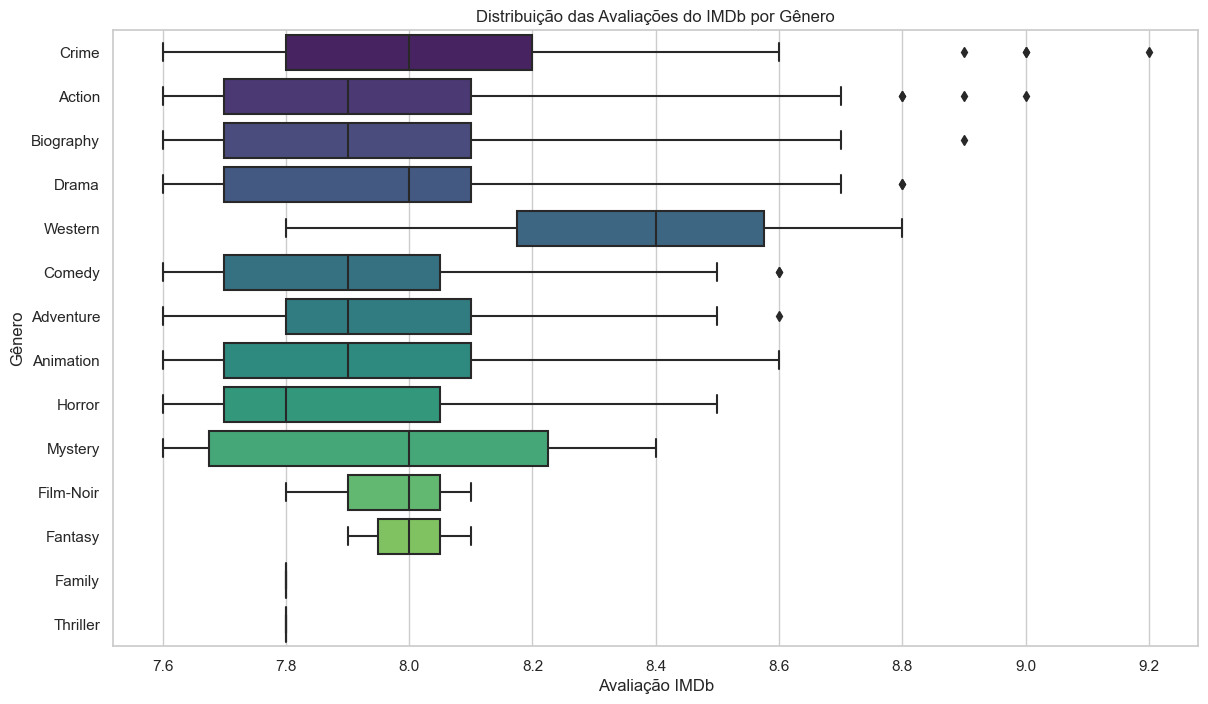

In [177]:
# Criar uma coluna para o gênero principal
df['Primary_Genre'] = df['Genre'].str.split(', ').str[0]

plt.figure(figsize=(14, 8))
sns.boxplot(x='IMDB_Rating', y='Primary_Genre', data=df, palette='viridis')
plt.title('Distribuição das Avaliações do IMDb por Gênero')
plt.xlabel('Avaliação IMDb')
plt.ylabel('Gênero')
plt.show()

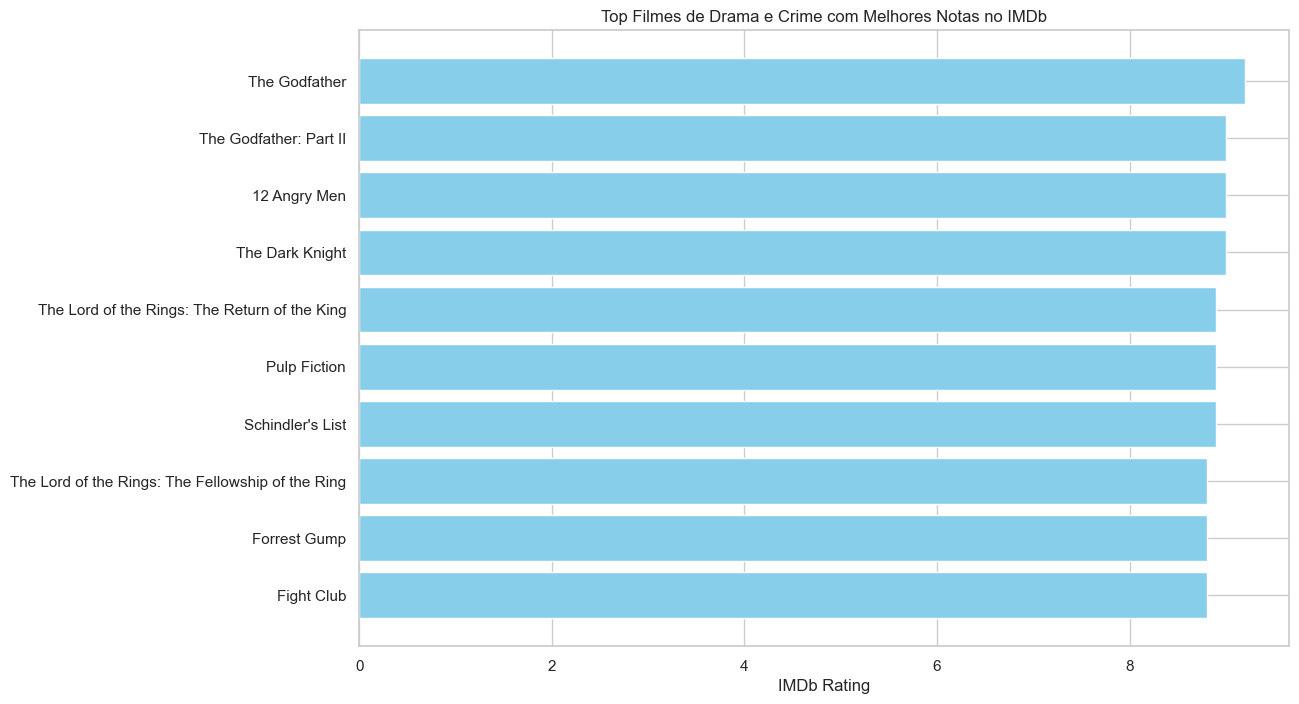

In [178]:
# Filtrando os dados para incluir apenas os gêneros Drama e Crime
filmes_drama_crime = df[(df['Genre'].str.contains('Drama')) | (df['Genre'].str.contains('Crime'))]

# Ordenando os filmes por nota do IMDb em ordem decrescente
filmes_drama_crime = filmes_drama_crime.sort_values(by='IMDB_Rating', ascending=False).head(10)

# Criando o gráfico de barras horizontal
plt.figure(figsize=(12, 8))
plt.barh(filmes_drama_crime['Series_Title'], filmes_drama_crime['IMDB_Rating'], color='skyblue')
plt.xlabel('IMDb Rating')
plt.title('Top Filmes de Drama e Crime com Melhores Notas no IMDb')
plt.gca().invert_yaxis()  # Inverter a ordem dos filmes para exibir do maior para o menor rating
plt.show()

In [179]:
# Fazendo a seleção da maior avaliação em todo o dataset, The Godfather também é o primeiro
df.sort_values(by='IMDB_Rating', ascending=False).head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Primary_Genre
1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime


##### Resposta
Para recomendar um filme para uma pessoa desconhecida, um bom critério seria selecionar um filme com alta avaliação IMDb e um gênero popular. Então, tendo como base o que foi construído e apresentado acima, eu recomendaria **The Godfather**, que é uma excelente recomendação com base em sua alta avaliação no IMDb (9.2) e sua classificação em gêneros populares como **Drama** e **Crime**.

#### B - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Com base na análise de correlação, os principais fatores que se correlacionam com a receita bruta de um filme incluem:

- Número de votos (No_of_Votes)

- Avaliação IMDb (IMDB_Rating)

- Metascore (Meta_score)

#### C- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

## Modelagem IMDB

Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


##### Previsão da Nota IMDb
Para prever a nota do IMDb, vamos usar um modelo de regressão. A tarefa é um problema de regressão porque estamos prevendo um valor contínuo.

##### Seleção de Variáveis e Transformações
Variáveis utilizadas:

- Released_Year
- Runtime
- Meta_score
- No_of_Votes
- Gross

Transformações:

Conversão de Gross para valores numéricos
Codificação de variáveis categóricas (por exemplo, Genre)

##### Modelo de Regressão
Vamos usar um modelo de regressão linear para prever a nota do IMDb.

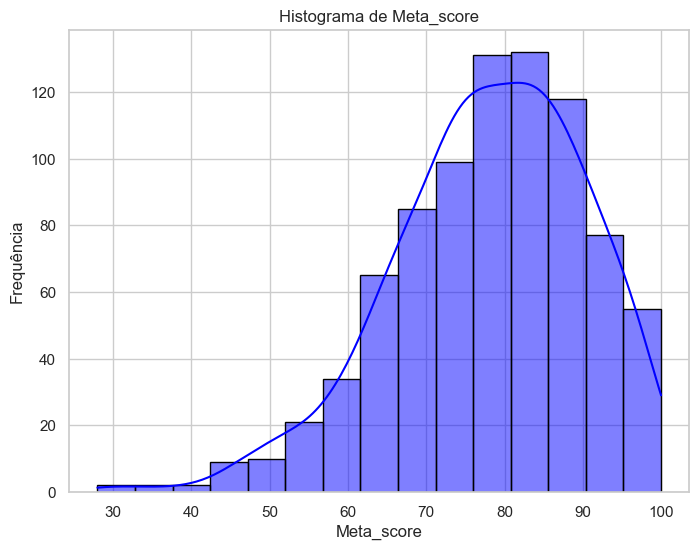

In [182]:
# Plotar o histograma de Meta_score
plt.figure(figsize=(8, 6))
sns.histplot(df['Meta_score'].dropna(), bins=15, kde=True, color='blue', edgecolor='black')
plt.title('Histograma de Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

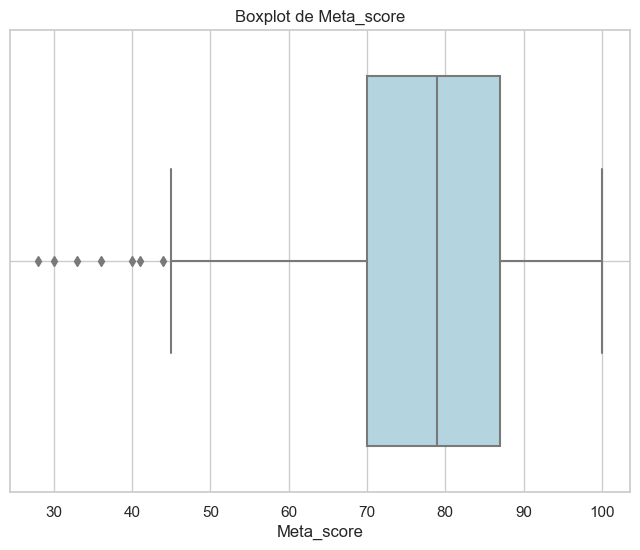

In [183]:
# Plotar o boxplot de Meta_score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Meta_score'], color='lightblue')
plt.title('Boxplot de Meta_score')
plt.xlabel('Meta_score')
plt.grid(True)
plt.show()

In [185]:
# Calcular a mediana da coluna 'Gross'
mean_meta = df['Meta_score'].mean()

# Imputar valores nulos com a mediana
df['Meta_score'].fillna(mean_meta, inplace=True)

In [188]:
# Excluir linhas nulas na coluna 'Meta_score'
df = df.dropna(subset=['Released_Year'])

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleção de variáveis
X = df[['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']]
y = df['IMDB_Rating']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Salvar o modelo
#import joblib
#joblib.dump(model, 'imdb_rating_model.pkl')


Root Mean Squared Error: 0.21075740610058077


In [191]:
# Características do filme
new_movie = {'Released_Year': 1994, 'Runtime': 142, 'Meta_score': 80.0, 'No_of_Votes': 2343110, 'Gross': 28341469}

# Criar um DataFrame
new_movie_df = pd.DataFrame([new_movie])

# Previsão da nota IMDb
predicted_rating = model.predict(new_movie_df)
print(f'Nota IMDb prevista: {round(predicted_rating[0],2)}')

Nota IMDb prevista: 9.21


In [193]:
df.head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Primary_Genre
1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
